<h3>Лабораторная работа №3</h3>
<p style="font-size: 16px">Исследование распределений и моментов связанных
с преобразованием случайных величин</p>
<hr>
<p style="font-size: 14px">Цель:</p>
<ol>
    <li>Применение распределений для преобразования случайных величин. </li>
</ol>
<hr>
<p><b><u>Задание</u></b></p>
<ol style="width: 60%">Сгенерировать выборку точек, равномерно распределенных внутри круга
двумя способами:
    <li>Равномерно распределить точки внутри квадрата, внутрь которого вписана
окружность, и отфильтровать точки, лежащие за пределами окружности.</li>
    <li>Генерировать точки путем задания случайного угла и расстояния от центра
окружности.</li>
</ol>
<ol style="width: 60%">Радиус окружности R=10, размер выборки 1000 точек.
Для созданных выборок сделать следующее:
    <li>Создать рисунок, иллюстрирующий расположение точек сгенерированной
выборки внутри окружности;</li>
    <li>Найти выборочные средние координат точек и их дисперсию;</li>
    <li>Построить график плотности распределения расстояния от случайной равномерно
распределенной точки в круге до фиксированной точки лежащей вне окружности
(к примеру, с координатами X=20, Y=0).</li>
    <li>Построить график плотности распределения расстояния между двумя
случайными точками, равномерно расположенными внутри круга.</li>
</ol>
<hr>

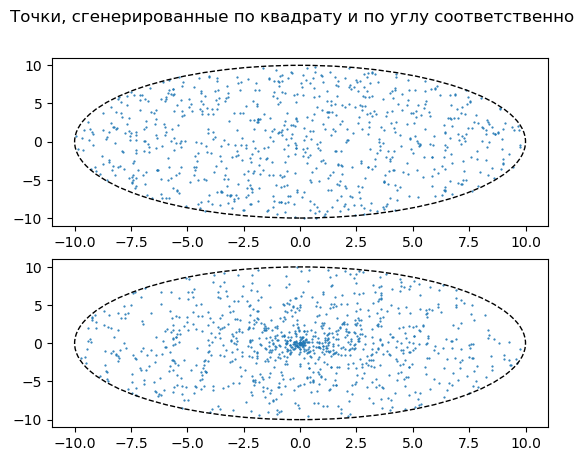

In [4]:
import numpy as np
import math as m
import matplotlib.patches as patches
import matplotlib.pyplot as plt

POINTS_COUNT = 1000;
R = 10

# Генерируем точки по квадрату
def giveMeSquarePoints():
    xFiltered = [] # Список для координат х, если точка входит в круг
    yFiltered = [] # Список для координат н, если точка входит в круг
    
    xSquarePoints = np.random.uniform(low = -R, high = R, size = POINTS_COUNT) # Для первой координаты
    ySquarePoints = np.random.uniform(low = -R, high = R, size = POINTS_COUNT) # Для второй координаты
    
    for i in range(POINTS_COUNT):
        if (m.sqrt(xSquarePoints[i] ** 2 + ySquarePoints[i] ** 2) <= R):
            xFiltered.append(xSquarePoints[i])
            yFiltered.append(ySquarePoints[i])
            
    return (xFiltered, yFiltered)

# Генерируем точки внутри круга по радиусу и углу
def giveMeCirclePoints():
    xFinal = [] # Список для преобразованных координат x
    yFinal = [] # Список для преобразованных координат y

    radiuses = np.random.uniform(low = 0, high = R, size = POINTS_COUNT) # Для первой координаты
    angles = np.random.uniform(low = 0, high = 2 * m.pi, size = POINTS_COUNT) # Для второй координаты

    for i in range(POINTS_COUNT):
        xFinal.append(m.cos(angles[i]) * radiuses[i])        
        yFinal.append(m.sin(angles[i]) * radiuses[i])  

    return (xFinal, yFinal)

# Получаем ссылку на оси и фигуру
fig, axes = plt.subplots(2)
fig.suptitle('Точки, сгенерированные по квадрату и по углу соответственно')

# Получаем точки
xS, yS = giveMeSquarePoints()
xC, yC = giveMeCirclePoints()

# Пускаем точки на скатерть
axes[0].scatter(xS, yS, s = 0.3)
axes[1].scatter(xC, yC, s = 0.3)

# Создаём и рисуем окружности
circle1 = patches.Circle((0, 0), radius = R, fill = False, lw = 1, ls = 'dashed', edgecolor = 'black')
circle2 = patches.Circle((0, 0), radius = R, fill = False, lw = 1, ls = 'dashed', edgecolor = 'black')

axes[0].add_patch(circle1)
axes[1].add_patch(circle2)

plt.show()

После получения карт Земли времён Ноя можно заметить, что на первом графике точки распределены равномерно по площади, а вот на втором графике точки распределены равномерно скорее по углу, что вызывает повышенную концентрацию в центре.

После того, как мы построили графики распределения точек, найдем средние показатели:

In [5]:
xS, yS = giveMeSquarePoints()
xC, yC = giveMeCirclePoints()

xSquareMean = np.mean(xS)
ySquareMean = np.mean(yS)
xCircleMean = np.mean(xC)
yCircleMean = np.mean(yC)

print("Для распределения по квадрату: среднее x = %.2f, среднее y = %.2f" %(xSquareMean, ySquareMean))
print("Для распределения по углу: среднее x = %.2f, среднее y = %.2f" %(xCircleMean, yCircleMean))

xSquareVar = np.var(xS)
ySquareVar = np.var(yS)
xCircleVar = np.var(xC)
yCircleVar = np.var(yC)

print("Для распределения по квадрату: средняя дисперсия по x = %.2f, средняя дисперсия по y = %.2f" %(xSquareVar, ySquareVar))
print("Для распределения по углу: средняя дисперсия по x = %.2f, средняя дисперсия по y = %.2f" %(xCircleVar, yCircleVar))

Для распределения по квадрату: среднее x = -0.04, среднее y = 0.00
Для распределения по углу: среднее x = 0.13, среднее y = 0.00
Для распределения по квадрату: средняя дисперсия по x = 26.19, средняя дисперсия по y = 25.13
Для распределения по углу: средняя дисперсия по x = 15.82, средняя дисперсия по y = 18.46


После нахождени средних значений координат и дисперсий, найдем плотности распределения:

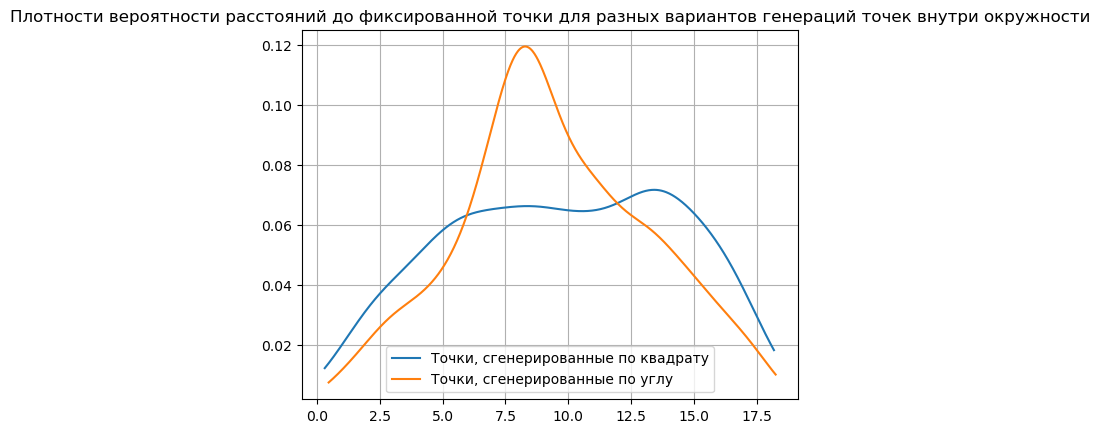

In [6]:
from scipy.stats import gaussian_kde

xS, yS = giveMeSquarePoints()
xC, yC = giveMeCirclePoints()

# Случайно получим неслучайную фиксированную точку
X_FIXED = np.random.uniform(low = -R, high = R)
Y_FIXED = np.random.uniform(low = -R, high = R)

# Расстояние до фикс точки от случайных, распределённых по квадрату
distSquare = []
for i in range(len(xS)):
    distSquare.append(m.sqrt((X_FIXED - xS[i]) ** 2 + (Y_FIXED - yS[i]) ** 2))

# Аналогично для точек сгенерированных по кругу
distCircle = []
for i in range(len(xC)):
    distCircle.append(m.sqrt((X_FIXED - xC[i]) ** 2 + (Y_FIXED - yC[i]) ** 2))

# Находим функцию для плотности распределения
pdfSquare = gaussian_kde(distSquare)
pdfCircle = gaussian_kde(distCircle)

# Мапим точки под графики
xForSquare = np.linspace(min(distSquare), max(distSquare), len(distSquare))
xForCircle = np.linspace(min(distCircle), max(distCircle), len(distCircle))

plt.plot(xForSquare, pdfSquare(xForSquare), label = 'Точки, сгенерированные по квадрату')
plt.plot(xForCircle, pdfCircle(xForCircle), label = 'Точки, сгенерированные по углу')

plt.title('Плотности вероятности расстояний до фиксированной точки для разных вариантов генераций точек внутри окружности')
plt.legend()
plt.grid()

plt.show()

Плотность вероятности подтверждает, что генерация по квадрату является более равномерной, нежели генерация по углу и радиусу

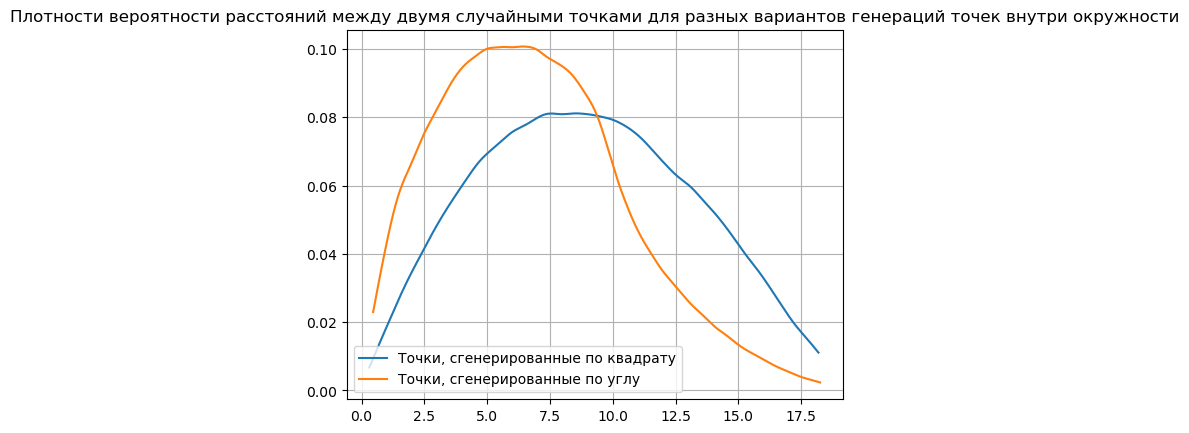

In [7]:
xS, yS = giveMeSquarePoints()
xC, yC = giveMeCirclePoints()

# Расстояние между двумя случайными точками из выборки для квадрата
distTwoSquare = []
for i in range(len(xS) - 1):
    for j in range(i + 1, len(xS)):
        distTwoSquare.append(m.sqrt((xS[j] - xS[i]) ** 2 + (yS[j] - yS[i]) ** 2))

# Расстояние между двумя случайными точками из выборки для радиуса и угла
distTwoCircle = []
for i in range(len(xC) - 1):
    for j in range(i + 1, len(xC)):
        distTwoCircle.append(m.sqrt((xC[j] - xC[i]) ** 2 + (yC[j] - yC[i]) ** 2))

# Находим функцию для плотности распределения
pdfSquare = gaussian_kde(distTwoSquare)
pdfCircle = gaussian_kde(distTwoCircle)

# Мапим точки под графики
xForSquare = np.linspace(min(distSquare), max(distSquare), len(distSquare))
xForCircle = np.linspace(min(distCircle), max(distCircle), len(distCircle))

plt.plot(xForSquare, pdfSquare(xForSquare), label = 'Точки, сгенерированные по квадрату')
plt.plot(xForCircle, pdfCircle(xForCircle), label = 'Точки, сгенерированные по углу')

plt.title('Плотности вероятности расстояний между двумя случайными точками для разных вариантов генераций точек внутри окружности')
plt.legend()
plt.grid()

plt.show()

Здесь мы можем сделать аналогичный вывод, что точки, сгенерированные по квадрату, являются более равномерно сгенерированными (если считать, что равномерность распределения - количество точек на единицу площади).

<hr>
<h3>Выводы:</h3>
<ol>
    <li>Применили и проанализировали разные виды распределения точек внутри площади, ограниченной окружностью</li>
    <li>Выяснили, что генерация по координатам внутри квадрата и отсечением лишних точек является более равномерным по площади, что соответствует действительности, если считать, что абонентские устройства равномерно распределены по площади покрытия одной базовой станции</li>
</ol>